In [2]:
# 주요 API import 와 한글 폰트 설정
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from matplotlib import font_manager, rc
font_path = "../data/Thedog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
# 문제 1
data_result = pd.read_csv("../data/cctv_seoul.csv")
data_result.set_index('구별', inplace=True)
display(data_result.head())

,CCTV수,인구수,한국인,외국인,고령자
구별,,,,,
강남구,2780,570500.0,565550.0,4950.0,63167.0
강동구,773,453233.0,449019.0,4214.0,54622.0
강북구,748,330192.0,326686.0,3506.0,54813.0
강서구,884,603772.0,597248.0,6524.0,72548.0
관악구,1496,525515.0,507203.0,18312.0,68082.0


In [5]:
# 문제 1
mycolors = sns.color_palette('hls',len(data_result['CCTV수']))
print(mycolors)

[(0.86, 0.3712, 0.33999999999999997), (0.86, 0.496, 0.33999999999999997), (0.86, 0.6208, 0.33999999999999997), (0.86, 0.7456, 0.33999999999999997), (0.8496, 0.86, 0.33999999999999997), (0.7247999999999999, 0.86, 0.33999999999999997), (0.6000000000000001, 0.86, 0.33999999999999997), (0.47519999999999996, 0.86, 0.33999999999999997), (0.3503999999999999, 0.86, 0.33999999999999997), (0.33999999999999997, 0.86, 0.4544), (0.33999999999999997, 0.86, 0.5792000000000002), (0.33999999999999997, 0.86, 0.7040000000000001), (0.33999999999999997, 0.86, 0.8288), (0.33999999999999997, 0.7663999999999997, 0.86), (0.33999999999999997, 0.6415999999999997, 0.86), (0.33999999999999997, 0.5167999999999999, 0.86), (0.33999999999999997, 0.3919999999999998, 0.86), (0.4128000000000003, 0.33999999999999997, 0.86), (0.5375999999999996, 0.33999999999999997, 0.86), (0.6623999999999999, 0.33999999999999997, 0.86), (0.7871999999999999, 0.33999999999999997, 0.86), (0.86, 0.33999999999999997, 0.808), (0.86, 0.339999999

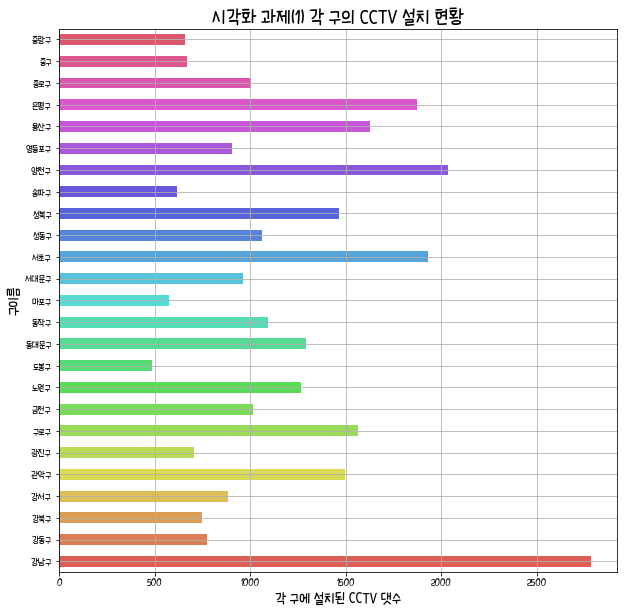

In [6]:
# 문제 1
plt.figure(figsize=(10,10))
data_result['CCTV수'].plot(kind='barh', grid=True, color=mycolors)
plt.xlabel('각 구에 설치된 CCTV 댓수', size=15)
plt.ylabel('구이름', size=15)
plt.title('시각화 과제(1) 각 구의 CCTV 설치 현황', size=20)
plt.savefig("../output/hw5.png") 
plt.show()

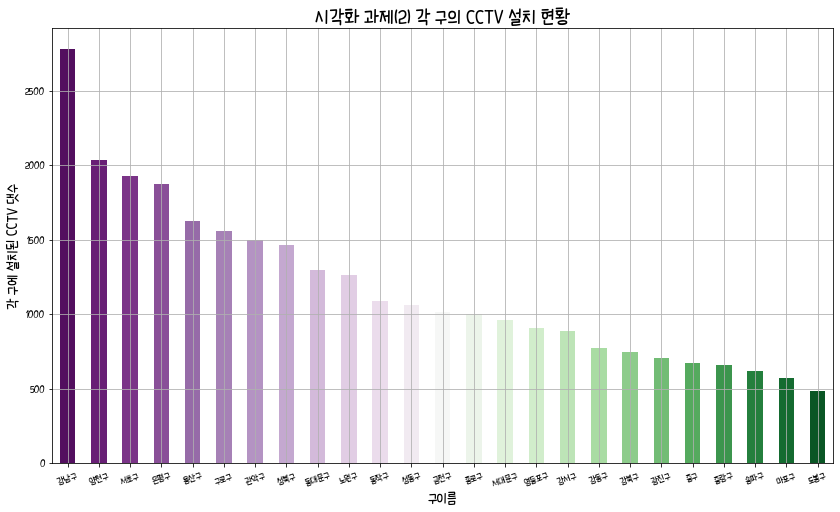

In [7]:
# 문제 2
mycolors = sns.color_palette('PRGn',len(data_result['CCTV수']))
plt.figure(figsize=(14,8))
data_result.sort_values(by='CCTV수', ascending=False, inplace=True)
data_result['CCTV수'].plot(kind='bar', grid=True, color=mycolors, rot=20)
plt.ylabel('각 구에 설치된 CCTV 댓수', size=15)
plt.xlabel('구이름', size=15)
plt.title('시각화 과제(2) 각 구의 CCTV 설치 현황', size=20)
plt.savefig("../output/hw6.png") 
plt.show()

In [8]:
# 문제 3
# 전처리 작업
data_result['CCTV비율'] = data_result['CCTV수']/data_result['인구수']*100
data_result['노인비율'] = data_result['고령자']/data_result['인구수']*100
data_result.sort_values('구별', ascending=True, inplace=True)

display(data_result.head())

,CCTV수,인구수,한국인,외국인,고령자,CCTV비율,노인비율
구별,,,,,,,
강남구,2780,570500.0,565550.0,4950.0,63167.0,0.487292,11.072217
강동구,773,453233.0,449019.0,4214.0,54622.0,0.170552,12.051638
강북구,748,330192.0,326686.0,3506.0,54813.0,0.226535,16.600342
강서구,884,603772.0,597248.0,6524.0,72548.0,0.146413,12.015794
관악구,1496,525515.0,507203.0,18312.0,68082.0,0.284673,12.955291


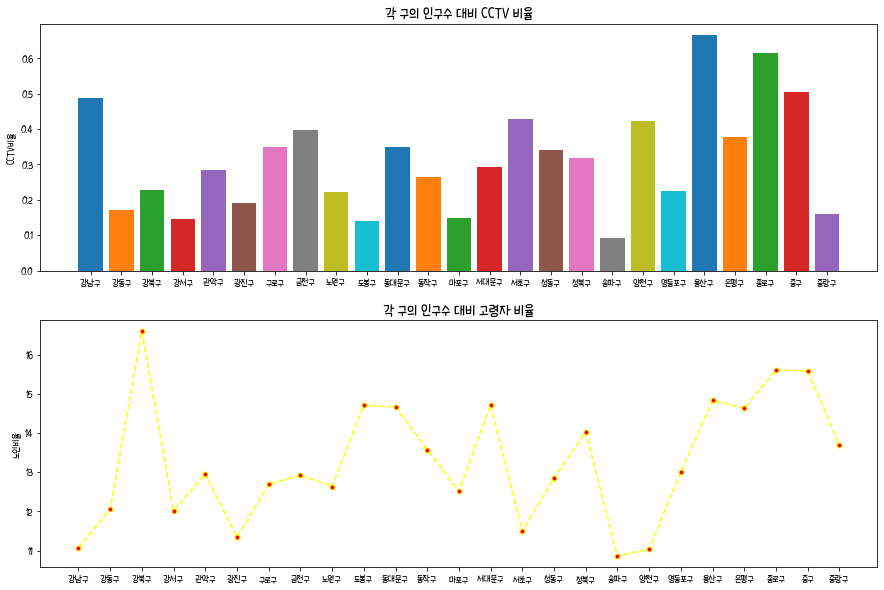

In [9]:
# 문제 3 
mycolors = sns.color_palette('tab10',len(data_result['CCTV비율']))
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.bar(data_result.index, data_result['CCTV비율'], width=0.8, color=mycolors)
plt.ylabel('CCTV비율', size=10)
plt.title('각 구의 인구수 대비 CCTV 비율', size=15)

plt.subplot(2,1,2)
plt.plot(data_result.index, data_result['노인비율'], linestyle='--', color='yellow', 
         marker='o', markersize=5, markerfacecolor='red')
plt.ylabel('노인비율', size=10)
plt.title('각 구의 인구수 대비 고령자 비율', size=15)

plt.savefig("../output/hw7.png")
plt.show()

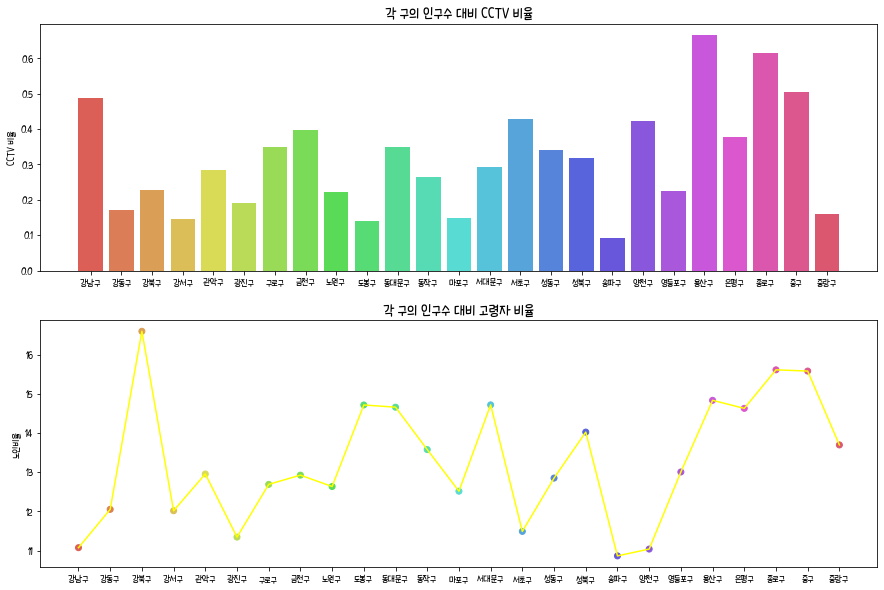

In [11]:
# 문제3 (추가)
df = data_result
mycolors = sns.color_palette('hls',len(df['CCTV수']))

plt.figure(figsize=(15, 10))   
plt.subplot(2,1,1)
plt.bar(df.index, df['CCTV비율'], color=mycolors)
plt.title('각 구의 인구수 대비 CCTV 비율', size = 15)
plt.ylabel('CCTV 비율')
plt.subplot(2,1,2)
plt.plot(df.index, df['노인비율'],  color='yellow')
plt.scatter(df.index, df['노인비율'], marker='o', color=mycolors)
plt.title('각 구의 인구수 대비 고령자 비율', size =15)
plt.ylabel('노인비율')

plt.savefig("../output/hw7_1.png")
plt.show()

### 위의 소스들에서는 바그래프를 그릴때 다양한 칼라를 설정하는데 있어서 seaborn 의 칼라 팔레트를 사용함
### 이번 예제에서는 matplotlib의 칼라 팔레트를 사용해 봄

## matplotlib의 칼라맵(cmap)  
(https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [12]:
cmaps = plt.colormaps()
for cm in cmaps:
    print(cm)

Accent
Accent_r
Blues
Blues_r
BrBG
BrBG_r
BuGn
BuGn_r
BuPu
BuPu_r
CMRmap
CMRmap_r
Dark2
Dark2_r
GnBu
GnBu_r
Greens
Greens_r
Greys
Greys_r
OrRd
OrRd_r
Oranges
Oranges_r
PRGn
PRGn_r
Paired
Paired_r
Pastel1
Pastel1_r
Pastel2
Pastel2_r
PiYG
PiYG_r
PuBu
PuBuGn
PuBuGn_r
PuBu_r
PuOr
PuOr_r
PuRd
PuRd_r
Purples
Purples_r
RdBu
RdBu_r
RdGy
RdGy_r
RdPu
RdPu_r
RdYlBu
RdYlBu_r
RdYlGn
RdYlGn_r
Reds
Reds_r
Set1
Set1_r
Set2
Set2_r
Set3
Set3_r
Spectral
Spectral_r
Wistia
Wistia_r
YlGn
YlGnBu
YlGnBu_r
YlGn_r
YlOrBr
YlOrBr_r
YlOrRd
YlOrRd_r
afmhot
afmhot_r
autumn
autumn_r
binary
binary_r
bone
bone_r
brg
brg_r
bwr
bwr_r
cividis
cividis_r
cool
cool_r
coolwarm
coolwarm_r
copper
copper_r
crest
crest_r
cubehelix
cubehelix_r
flag
flag_r
flare
flare_r
gist_earth
gist_earth_r
gist_gray
gist_gray_r
gist_heat
gist_heat_r
gist_ncar
gist_ncar_r
gist_rainbow
gist_rainbow_r
gist_stern
gist_stern_r
gist_yarg
gist_yarg_r
gnuplot
gnuplot2
gnuplot2_r
gnuplot_r
gray
gray_r
hot
hot_r
hsv
hsv_r
icefire
icefire_r
inferno
infern

In [13]:
data_result = pd.read_csv("../data/cctv_seoul.csv")
data_result.set_index('구별', inplace=True)

<class 'matplotlib.colors.ListedColormap'>


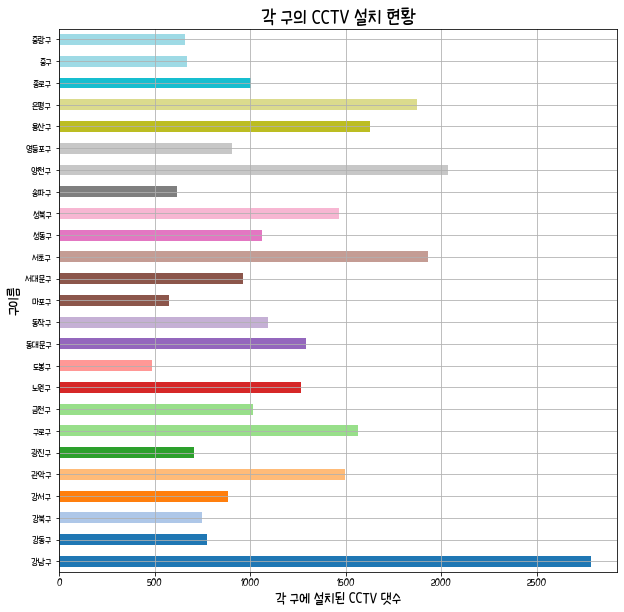

In [14]:
mycolors = plt.get_cmap("tab20", len(data_result['CCTV수']))
print(type(mycolors))
plt.figure(figsize=(10,10))
data_result['CCTV수'].plot(kind='barh', grid=True, color=mycolors.colors)
plt.xlabel('각 구에 설치된 CCTV 댓수', size=15)
plt.ylabel('구이름', size=15)
plt.title('각 구의 CCTV 설치 현황', size=20)
plt.savefig("../output/hw5.png") 
plt.show()

<class 'matplotlib.colors.ListedColormap'>


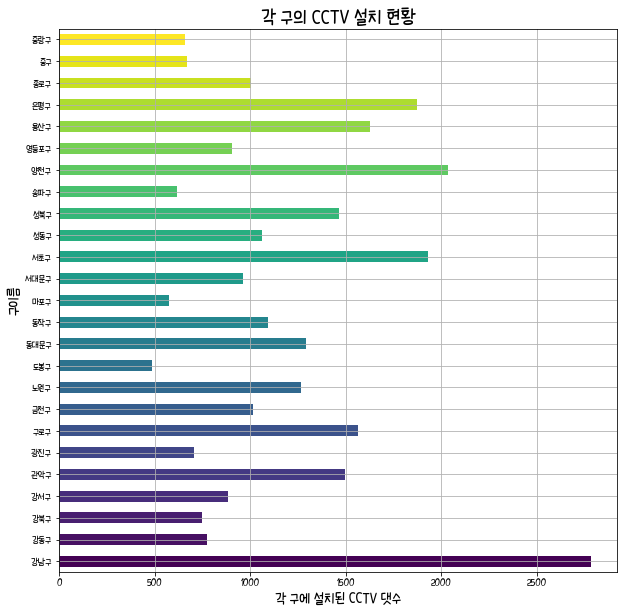

In [15]:
mycolors = plt.get_cmap("viridis", len(data_result['CCTV수']))
print(type(mycolors))
plt.figure(figsize=(10,10))
data_result['CCTV수'].plot(kind='barh', grid=True, color=mycolors.colors)
plt.xlabel('각 구에 설치된 CCTV 댓수', size=15)
plt.ylabel('구이름', size=15)
plt.title('각 구의 CCTV 설치 현황', size=20)
plt.savefig("../output/hw5.png") 
plt.show()

<class 'matplotlib.colors.ListedColormap'>


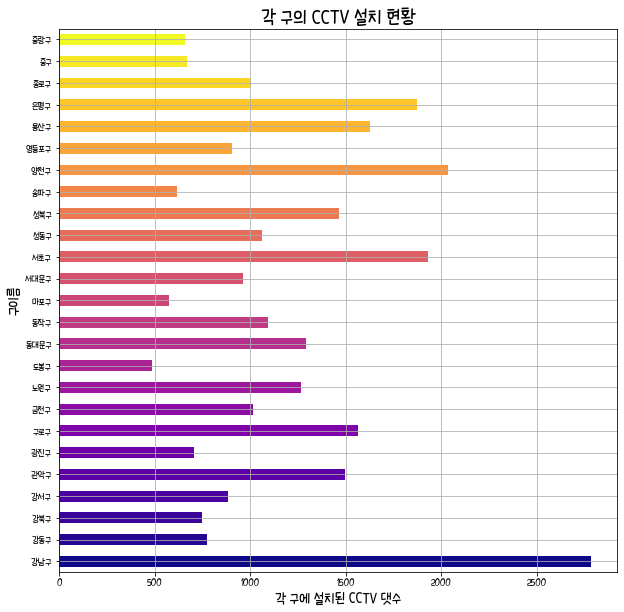

In [16]:
mycolors = plt.get_cmap("plasma", len(data_result['CCTV수']))
print(type(mycolors))
plt.figure(figsize=(10,10))
data_result['CCTV수'].plot(kind='barh', grid=True, color=mycolors(range(25)))
plt.xlabel('각 구에 설치된 CCTV 댓수', size=15)
plt.ylabel('구이름', size=15)
plt.title('각 구의 CCTV 설치 현황', size=20)
plt.savefig("../output/hw5.png") 
plt.show()

<class 'matplotlib.colors.LinearSegmentedColormap'>


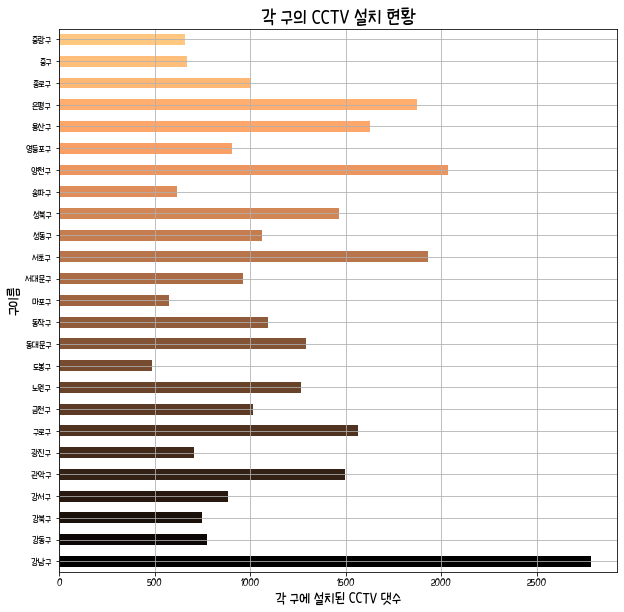

In [17]:
mycolors = plt.get_cmap("copper", len(data_result['CCTV수']))
print(type(mycolors))
plt.figure(figsize=(10,10))
data_result['CCTV수'].plot(kind='barh', grid=True, color=mycolors(range(25)))
plt.xlabel('각 구에 설치된 CCTV 댓수', size=15)
plt.ylabel('구이름', size=15)
plt.title('각 구의 CCTV 설치 현황', size=20)
plt.savefig("../output/hw5.png") 
plt.show()

In [18]:
viridis = plt.get_cmap('viridis', 8)
print(type(viridis))
print('viridis.colors', viridis.colors)
print('viridis([0,1,2])', viridis([0,1,2]))

<class 'matplotlib.colors.ListedColormap'>
viridis.colors [[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis([0,1,2]) [[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]]


In [19]:
copper = plt.get_cmap('copper', 8)
print(type(copper))
#print('copper.colors', copper.colors)
print('copper([0,1,2])', copper([0,1,2]))

<class 'matplotlib.colors.LinearSegmentedColormap'>
copper([0,1,2]) [[0.         0.         0.         1.        ]
 [0.17647055 0.1116     0.07107143 1.        ]
 [0.35294109 0.2232     0.14214286 1.        ]]
